In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import bt
import numpy as np
import pandas as pd

In [2]:
raw_data = bt.get('BTCUSD=X', start='2017-01-01', mrefresh=True)
raw_data.head()

,btcusdx
Date,
2017-01-02,1013.419678
2017-01-03,1037.300293
2017-01-04,1114.980103
2017-01-05,999.650146
2017-01-06,894.998718


In [35]:
data = raw_data.copy()

short_sma = data.rolling(3).mean()
long_sma = data.rolling(15).mean()
data["short_sma"] = short_sma
data["long_sma"] = long_sma

data["sma_ratio"] = data["short_sma"] / data["long_sma"]
data["sma_ratio"].fillna(1)
data["sell_signal"] = data["sma_ratio"] > 1.30
data["buy_signal"] = data["sma_ratio"] < 0.85
#data["hold"] = np.where(np.greater(data["buy_signal"], 0), 1, 0)
#data["hold"] = np.where(np.greater())
# ESSAYER DE FAIRE UNE NP SERIE, ITERER, ET CONCAT APRES


#data.assign(hold = lambda r: 1 if np.greater(r.buy_signal, 0) else 0)

#data["buy_signal"] = data["buy_signal"].fillna(True)
#data["hold"] = 1 if data["buy_signal"] else 0
#data["hold"] = np.where(data["buy_signal"], "")
# data.loc[data["buy_signal"], "hold"] = True
# data.loc[data["sell_signal"], "hold"] = False
# data.iloc[0, data.columns.get_loc("hold")] = True
# data.loc[data["hold"].isna(), "hold"] = data.shift(1)["hold"]
#data["hold"] = data["buy_signal"]
#data["hold"] = True if data["buy_signal"].bool() else False #if data["sell_signal"].bool() else False #data.shift(1)["hold"].bool()

data.tail(30)

,btcusdx,short_sma,long_sma,sma_ratio,sell_signal,buy_signal
Date,,,,,,
2017-12-12,17857.142578,17066.579427,12044.082715,1.417009,True,False
2017-12-13,16666.667969,17157.654297,12604.229720,1.361262,True,False
2017-12-14,16666.667969,17063.492839,13177.706510,1.294876,False,False
2017-12-15,17857.142578,17063.492839,13817.218490,1.234944,False,False
2017-12-18,18867.923828,17797.244792,14427.830859,1.233536,False,False
2017-12-19,17857.142578,18194.069661,14958.241016,1.216324,False,False
2017-12-20,16666.667969,17797.244792,15415.757422,1.154484,False,False
2017-12-21,15625.000000,16716.270182,15790.757422,1.058611,False,False
2017-12-22,14084.506836,15458.724935,16005.086849,0.965863,False,False


In [43]:
n = len(data)
hold = np.array([1]) #hold initially
for i in range(1, n):
    hold = np.append(
        hold,
        np.where(
                data.iloc[i, data.columns.get_loc("buy_signal")] |
                (hold[i-1] & (1^data.iloc[i, data.columns.get_loc("sell_signal")])),
            1,
            0
        )
    )
data["hold"] = hold
data.head(100)

,btcusdx,short_sma,long_sma,sma_ratio,sell_signal,buy_signal,hold
Date,,,,,,,
2017-01-02,1013.419678,NaN,NaN,NaN,False,False,1
2017-01-03,1037.300293,NaN,NaN,NaN,False,False,1
2017-01-04,1114.980103,1055.233358,NaN,NaN,False,False,1
2017-01-05,999.650146,1050.643514,NaN,NaN,False,False,1
2017-01-06,894.998718,1003.209656,NaN,NaN,False,False,1
2017-01-09,896.917297,930.522054,NaN,NaN,False,False,1
2017-01-10,903.913940,898.609985,NaN,NaN,False,False,1
2017-01-11,780.810791,860.547343,NaN,NaN,False,False,1
2017-01-12,807.617432,830.780721,NaN,NaN,False,False,1


In [107]:
def ma_timing(ticker, start='2017-01-01', short_ma=3, long_ma=15, buy_limit=0.90, sell_limit=1.20, name='ma_timing'):
    # get the data
    data = bt.get(ticker, start=start)
    
    # compute buy and sell signals
    short_sma = data.ewm(span=short_ma).mean()
    long_sma = data.ewm(span=long_ma).mean()
    sma_ratio = short_sma / long_sma
    sma_ratio.fillna(1)
    
    sell_signal = sma_ratio > sell_limit
    buy_signal = sma_ratio < buy_limit
    
    # derive hold flag from signals
    hold = np.array([1]) #hold initially
    for i in range(1, len(data)):
        hold = np.append(
            hold,
            np.where(buy_signal.iloc[i] | (hold[i-1] & (1^sell_signal.iloc[i])), 1, 0 )
        )
    tw = pd.DataFrame(data=hold, columns=data.columns, index=data.index)
    chart_sell_limit = pd.DataFrame(data=[sell_limit] * len(data), columns= data.columns, index=data.index)
    chart_buy_limit = pd.DataFrame(data=[buy_limit] * len(data), columns= data.columns, index=data.index)
        
    # plot the target weights + chart of price & SMAs
    tmp = bt.merge(data, short_sma, long_sma, sma_ratio, tw, chart_sell_limit, chart_buy_limit)
    tmp.columns = ['price', 'short_sma', 'long_sma', 'sma_ratio', 'tw', 'sell_limit', 'buy_limit']
    tmp.plot(figsize=(15,8), secondary_y=['sma_ratio', 'tw', 'sell_limit', 'buy_limit'])
    
    # build and return the bt strat
    s = bt.Strategy(
        name, 
        [bt.algos.RunDaily(), 
         bt.algos.WeighTarget(tw),
         bt.algos.Rebalance()], 
    )

    return bt.Backtest(s, data)

In [108]:
def ma_cross(ticker, start='2017-01-01', short_ma=50, long_ma=200, name='ma_cross'):
    # these are all the same steps as above
    data = bt.get(ticker, start=start)
    short_sma = data.rolling(short_ma).mean()
    long_sma  = data.rolling(long_ma).mean()

    # target weights
    tw = long_sma.copy()
    tw[short_sma < long_sma] = 0
    tw[short_sma >= long_sma] = 1
    tw[long_sma.isnull()] = 0.0
    
    # plot the target weights + chart of price & SMAs
    tmp = bt.merge(data, short_sma, long_sma, tw)
    tmp.columns = ['price', 'short_sma', 'long_sma', 'tw']
    ax = tmp.plot(figsize=(15,5), secondary_y=['tw'])

    # here we specify the children (3rd) arguemnt to make sure the strategy
    # has the proper universe. This is necessary in strategies of strategies
    s = bt.Strategy(
        name, 
        [bt.algos.RunDaily(), 
         bt.algos.WeighTarget(tw),
         bt.algos.Rebalance()], 
    )

    return bt.Backtest(s, data)


In [109]:
def long_only(tickers, start='2017-01-01', name='long_only'):
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    data = bt.get(tickers, start=start)
    return bt.Backtest(s, data)

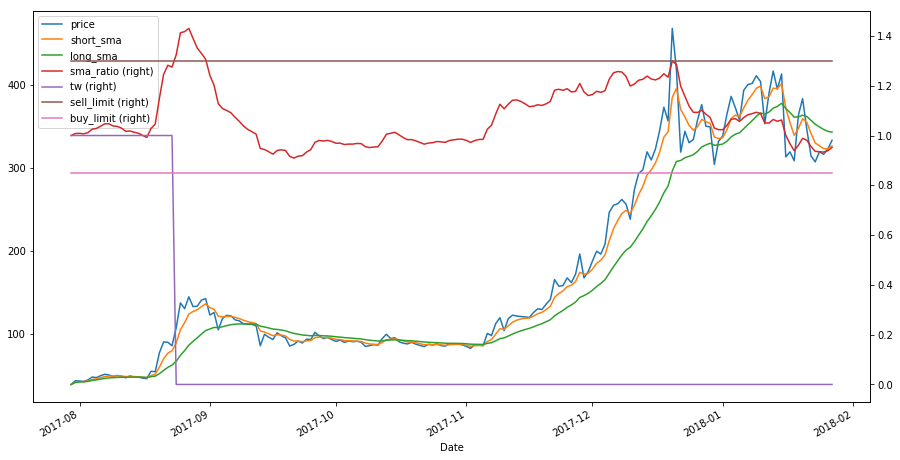

In [145]:
#ticker = "BTCUSD=X" 
#start = '2016-01-01'

ticker = "XMR-USD"
start = '2017-07-31'
strat = ma_timing(ticker, start, short_ma=5, long_ma=20, sell_limit=1.30, buy_limit=0.85)
bm = long_only(ticker, start)

In [140]:
# debugging
#strat.data.head()
#bm.data.head()

In [141]:
res = bt.run(bm, strat)

long_only
0% [# ] 100% | ETA: 00:00:00ma_timing


/usr/local/lib/python3.6/site-packages/ffn/core.py:209: RuntimeWarning: invalid value encountered in double_scalars
  self.calmar = self.cagr / abs(self.max_drawdown)


0% [# ] 100% | ETA: 00:00:00

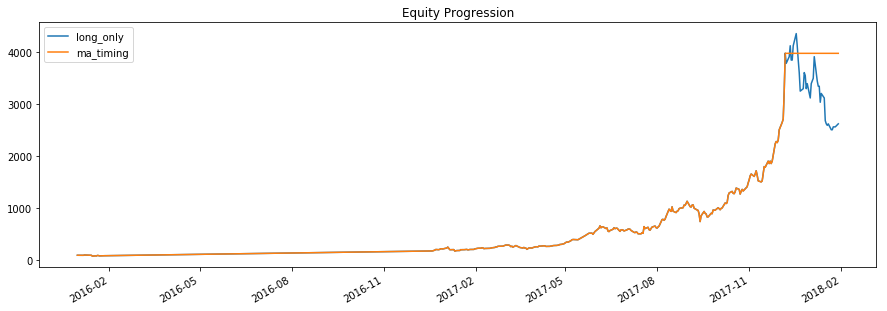

In [133]:
res.plot()

In [134]:
#bt.merge(res.get_transactions(strategy_name='ma_timing'), res.get_transactions(strategy_name='long_only'))
res.display()

Stat                 long_only    ma_timing
-------------------  -----------  -----------
Start                2015-12-31   2015-12-31
End                  2018-01-29   2018-01-29
Risk-free rate       0.00%        0.00%

Total Return         2519.32%     3870.70%
Daily Sharpe         2.69         3.04
Daily Sortino        5.69         6.39
CAGR                 380.36%      486.68%
Max Drawdown         -42.39%      -34.30%
Calmar Ratio         8.97         14.19

MTD                  -22.73%      0.00%
3m                   96.59%       198.27%
6m                   309.09%      520.68%
YTD                  -22.73%      0.00%
1Y                   1137.83%     1778.03%
3Y (ann.)            380.36%      486.68%
5Y (ann.)            380.36%      486.68%
10Y (ann.)           380.36%      486.68%
Since Incep. (ann.)  380.36%      486.68%

Daily Sharpe         2.69         3.04
Daily Sortino        5.69         6.39
Daily Mean (ann.)    335.77%      364.62%
Daily Vol (ann.)     124.94%      120